### In this project, I rehearse what I have done and learned since May 2020 in classifying images of digits

In [1]:
# Load the data set
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Have a look at its attributes
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
# Have a look at the matrix representation of an image example
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

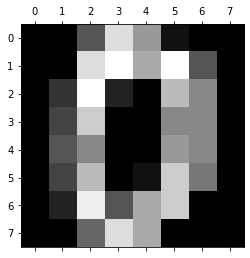

In [4]:
# Show an image example
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(digits.images[0])

In [5]:
# Return the true values of images from 0 to 4
digits.target[:5]

array([0, 1, 2, 3, 4])

In [6]:
# Split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target, random_state=1)

In [7]:
y_test

array([2, 6, 5, 8, 5, 5, 3, 6, 5, 4, 7, 5, 7, 4, 0, 9, 1, 1, 2, 5, 5, 7,
       2, 8, 6, 3, 7, 3, 8, 0, 2, 0, 5, 4, 8, 0, 2, 7, 4, 2, 6, 2, 3, 2,
       5, 1, 4, 8, 7, 8, 7, 2, 3, 7, 8, 7, 1, 1, 3, 1, 3, 7, 6, 5, 9, 2,
       0, 6, 4, 9, 5, 5, 8, 1, 5, 7, 2, 6, 7, 9, 2, 3, 9, 5, 4, 7, 4, 7,
       0, 5, 3, 6, 9, 5, 9, 7, 7, 6, 7, 1, 0, 7, 6, 9, 7, 8, 4, 1, 6, 6,
       4, 4, 8, 3, 4, 3, 8, 0, 1, 7, 9, 0, 1, 5, 4, 1, 9, 1, 4, 2, 0, 4,
       1, 0, 5, 8, 0, 3, 5, 8, 0, 6, 4, 4, 3, 9, 3, 7, 8, 3, 6, 2, 6, 5,
       3, 5, 9, 6, 3, 0, 6, 6, 8, 1, 2, 6, 8, 7, 1, 9, 0, 0, 5, 2, 9, 2,
       9, 8, 3, 8, 0, 7, 1, 0, 6, 3, 9, 3, 1, 1, 9, 2, 9, 0, 9, 5, 0, 0,
       7, 8, 7, 4, 4, 0, 1, 9, 6, 4, 9, 3, 8, 5, 8, 0, 1, 3, 1, 5, 4, 1,
       3, 8, 8, 0, 0, 8, 8, 3, 9, 0, 6, 7, 5, 0, 9, 3, 7, 5, 4, 8, 6, 6,
       5, 4, 5, 8, 6, 4, 3, 7, 4, 6, 5, 2, 0, 2, 3, 7, 0, 9, 3, 9, 1, 5,
       9, 5, 2, 2, 9, 3, 9, 6, 8, 9, 3, 1, 7, 6, 7, 6, 6, 3, 7, 0, 1, 9,
       3, 4, 2, 8, 7, 3, 2, 8, 4, 7, 0, 3, 1, 1, 2,

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model_params = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': range(1, 10),
            'solver': ['liblinear', 'sag', 'saga'],
            'max_iter': [1000]
        }
    },
    
    'SVC': {
        'model': SVC(),
        'params': {
            'C': range(1, 10),
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
        }
    },
    
    'randomforest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': range(100, 1000, 100),
            'criterion': ['gini', 'entropy'],
            'max_features': ['auto', 'log2', 'sqrt'],
        }
    }
}

In [9]:
from sklearn.model_selection import StratifiedKFold , cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

n_iter_search = 10
scores = []
best_estimators = []

for algo, param in model_params.items():
    grid = RandomizedSearchCV(param['model'], param['params'], cv=StratifiedKFold(), return_train_score=False, n_iter=n_iter_search, verbose=0)
    grid.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_parameters': grid.best_params_,
        'best_score': grid.best_score_
    })
    best_estimators.append(grid.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [10]:
scores

[{'model': 'logistic_regression',
  'best_parameters': {'solver': 'sag', 'max_iter': 1000, 'C': 4},
  'best_score': 0.9645204219899342},
 {'model': 'SVC',
  'best_parameters': {'kernel': 'rbf', 'C': 8},
  'best_score': 0.9895688153310104},
 {'model': 'randomforest',
  'best_parameters': {'n_estimators': 500,
   'max_features': 'sqrt',
   'criterion': 'entropy'},
  'best_score': 0.9798296554394115}]

In [11]:
best_estimators

[LogisticRegression(C=4, max_iter=1000, solver='sag'),
 SVC(C=8),
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                        n_estimators=500)]

In [12]:
final_model = SVC(kernel='rbf', C=8)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       0.92      1.00      0.96        34
           6       1.00      0.97      0.99        37
           7       1.00      0.97      0.99        37
           8       0.94      1.00      0.97        33
           9       1.00      0.92      0.96        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

